In [62]:
import itertools as it

import seaborn as sns

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [53]:
arr0 = np.random.normal(size=100)
arr1 = np.random.normal(size=100)
arr2 = np.random.normal(size=100)
arr3 = np.random.normal(size=100)

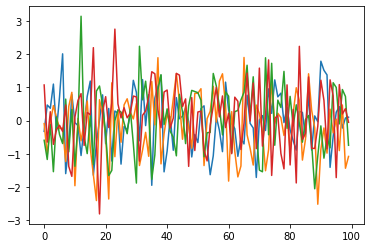

In [54]:
plt.plot(arr0)
plt.plot(arr1)
plt.plot(arr2)
plt.plot(arr3)
plt.show()

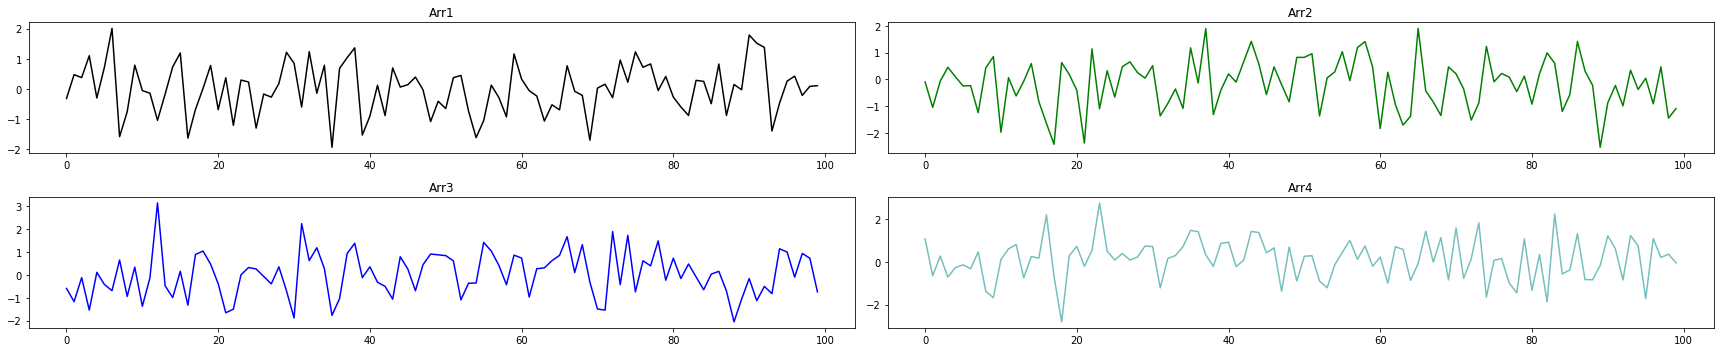

In [68]:
arrs = [arr0, arr1, arr2, arr3]
n = len(arrs)


fig, axes = plt.subplots(2, int(n / 2), figsize=(6 * n, 5))
axes = it.chain(*axes)

for ax, arr, title, c in zip(axes, arrs, ["Arr1", "Arr2", "Arr3", "Arr4"], ["k", "g", "b", "#75bfbd"]):
    ax.plot(arr, c=c)
    ax.set_title(title)

fig.tight_layout()

Text(0, 0.5, 'foo')

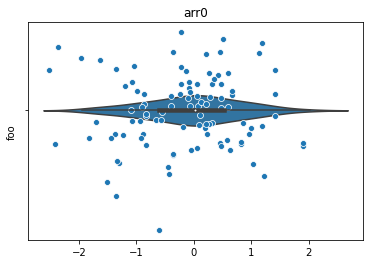

In [78]:
ax = sns.violinplot(arr0)
sns.scatterplot(arr1, arr2, ax=ax)

ax.set_title("arr0")
ax.set_ylabel("foo")

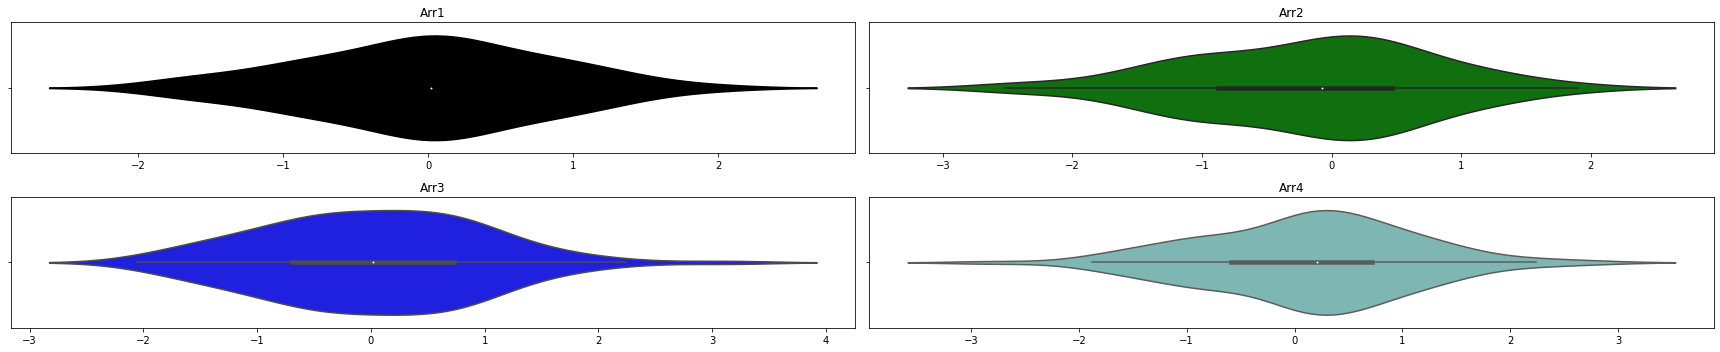

In [81]:
arrs = [arr0, arr1, arr2, arr3]
n = len(arrs)


fig, axes = plt.subplots(2, int(n / 2), figsize=(6 * n, 5))
axes_it = it.chain(*axes)

for ax, arr, title, c in zip(axes, arrs, ["Arr1", "Arr2", "Arr3", "Arr4"], ["k", "g", "b", "#75bfbd"]):
    sns.violinplot(arr, ax=ax, color=c)
    ax.set_title(title)

fig.tight_layout()

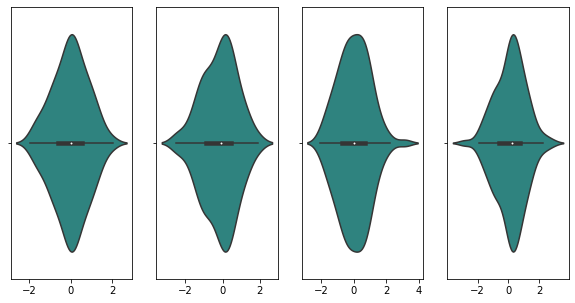

In [94]:
def violin(arr, axes=None, **kwargs):
    n = len(arr)
    if axes is None:
        fig, axes = plt.subplots(2, int(n / 2), figsize=(6 * n, 5))
    if np.ndim(axes) > 1:
        axes_it = it.chain(*axes)
    else:
        axes_it = axes

    for ax, arr in zip(axes_it, arrs):
        sns.violinplot(arr, ax=ax, **kwargs)
        
    return axes     

fig, axes = plt.subplots(1, 4, figsize=(10, 5))
axes = violin(arrs, axes=axes, palette="viridis")



#axes[0][0].set_title("foo")
    

In [179]:
df = pd.DataFrame({
    "x": np.abs(arr0),
    "y": np.abs(arr1),
    "z": np.abs(arr2),
})

In [106]:
df["x"] = df.x.apply(lambda e: e ** 2)

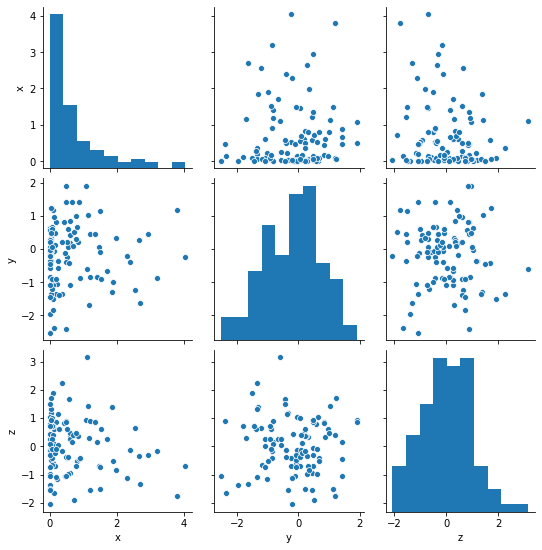

In [118]:
sns.pairplot(df)

<AxesSubplot:xlabel='x', ylabel='z'>

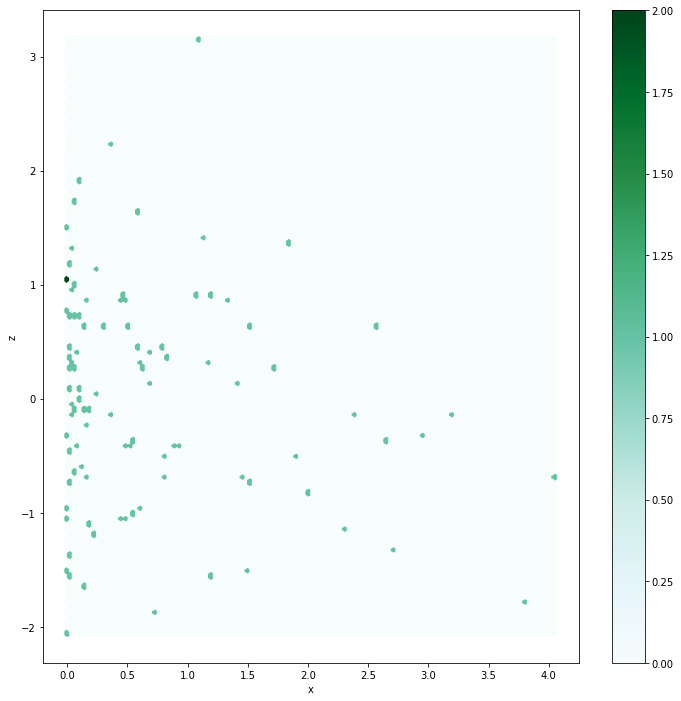

In [113]:
fig, ax = plt.subplots(figsize=(12,12))
df.plot.hexbin("x", "z", ax=ax)

In [167]:
import attr

@attr.s()
class PlotPersonaXPlata:
    
    pxp = attr.ib()
    
    def __call__(self, pname=None, ax=None, **kwargs):
        pname = "plata_line" if pname is None else pname
        method = getattr(self, pname)
        return method(ax=ax, **kwargs)
        
        
    def plata_line(self, ax=None, **kwargs):
        ax = plt.gca() if ax is None else ax
        ax.plot(self.pxp.plata, **kwargs)
        return ax
    
    def plata_cumsum(self, ax=None, **kwargs):
        ax = plt.gca() if ax is None else ax
        data = np.cumsum(self.pxp.plata)
        ax.plot(data, **kwargs)
        return ax


@attr.s()
class PersonaXPlata:
    
    nombres = attr.ib()
    plata = attr.ib()
    plot = attr.ib(init=False)
    
    @plot.default
    def _plot_default(self):
        return PlotPersonaXPlata(pxp=self)
    
    def _repr_markdown_(self):
        rows = []
        for n, p in zip(self.nombres, self.plata):
            rows.append(f"- **{n}**: ${p}")
        return "\n\n".join(rows)
    
        
            
    

pxp = PersonaXPlata(
    nombres=np.array(["Valeria", "Rafa", "Jose", "Bernardo", "Diego", "Charly", "Lucas"]),
    plata=np.random.uniform(30_000, 60_000, size=7)
    )

Text(0.5, 1.0, 'zaraza')

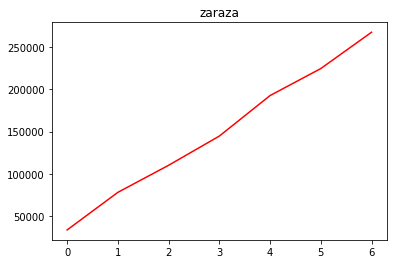

In [169]:
ax = plt.gca()
pxp.plot.plata_cumsum(c="r", ax=ax)
ax.set_title("zaraza")

<AxesSubplot:>

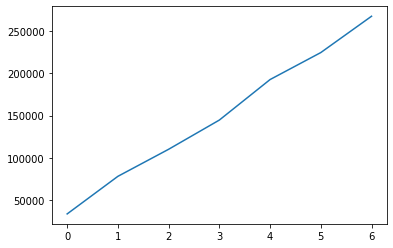

In [172]:
pxp.plot("plata_cumsum")

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>,
       <AxesSubplot:ylabel='z'>], dtype=object)

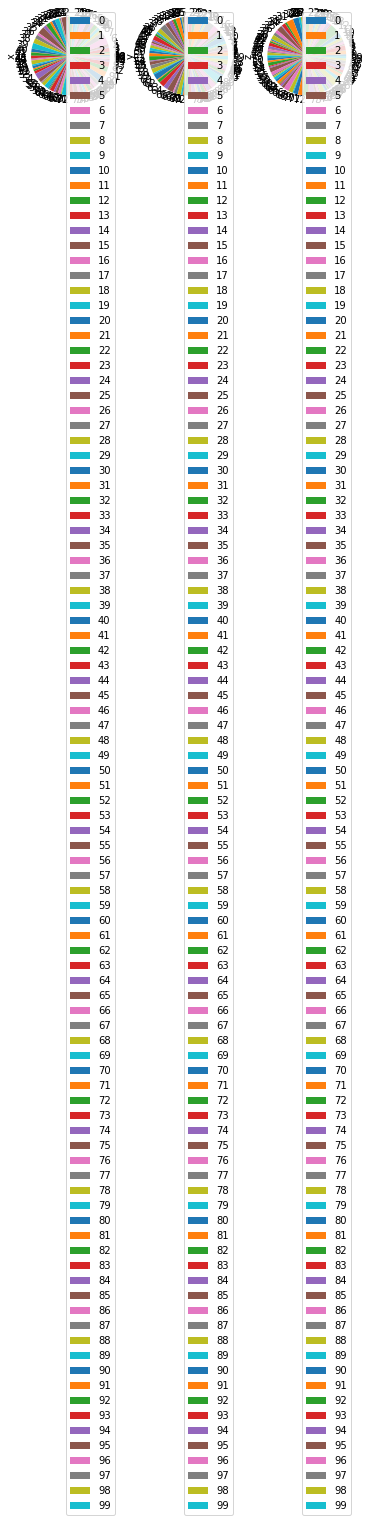

In [181]:
df.plot.pie(subplots=True)